In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [41]:
df.sample(5)

,Survived,Age,Fare
700,1,18.0,227.5250
496,1,54.0,78.2667
416,1,34.0,32.5000
785,0,25.0,7.2500
17,1,NaN,13.0000


In [43]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [45]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [49]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [80]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

C:\Users\sudha\AppData\Local\Temp\ipykernel_2004\121644049.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

In [84]:
X_test

,Age,Fare,Age_imputed
165,9.0,20.5250,9.0
511,NaN,8.0500,47.0
162,26.0,7.7750,26.0
272,41.0,19.5000,41.0
793,NaN,30.6958,29.0
...,...,...,...
257,30.0,86.5000,30.0
455,29.0,7.8958,29.0
540,36.0,71.0000,36.0
510,29.0,7.7500,29.0


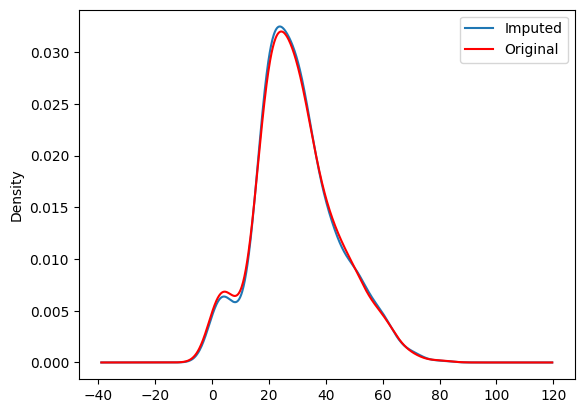

In [100]:
fig = plt.figure()
ax = plt.subplot(111)
X_train['Age_imputed'].plot(kind='kde', label='Imputed', ax=ax)
X_train['Age'].plot(kind='kde', label='Original', ax=ax, color='red')
ax.legend()